In [1]:
'''From sklearn.datasets load digits dataset and do following

1) Classify digits (0 to 9) using KNN classifier. 
You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. 
You can manually try different values of K or use gridsearchcv
2) Plot confusion matrix
3) Plot classification report'''

'From sklearn.datasets load digits dataset and do following\n\n1) Classify digits (0 to 9) using KNN classifier. \nYou can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. \nYou can manually try different values of K or use gridsearchcv\n2) Plot confusion matrix\n3) Plot classification report'

In [1]:
from sklearn.datasets import load_digits

In [3]:
digit = load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
},cv=5)

In [19]:
clf.fit(digit.data,digit.target)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,2


In [20]:
clf.cv_results_

{'mean_fit_time': array([0.00203972, 0.00262685, 0.00164242, 0.00163474, 0.00184822,
        0.00171266, 0.00183744, 0.00176306, 0.00154409, 0.0015542 ]),
 'std_fit_time': array([3.43600810e-04, 1.14989925e-03, 5.47307284e-05, 4.11202867e-05,
        2.92722405e-04, 3.02265288e-04, 3.62030315e-04, 3.52219420e-04,
        1.70839155e-04, 1.74355910e-04]),
 'mean_score_time': array([0.00796919, 0.00987029, 0.0051374 , 0.00571041, 0.00563235,
        0.00514274, 0.00540051, 0.00557933, 0.00580091, 0.00611186]),
 'std_score_time': array([0.00099128, 0.00445278, 0.00024886, 0.00031666, 0.00053587,
        0.00043276, 0.00063387, 0.00024869, 0.00019244, 0.00015643]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5}

In [21]:
import pandas as pd
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002040,0.000344,0.007969,0.000991,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,3
1,0.002627,0.001150,0.009870,0.004453,2,{'n_neighbors': 2},0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
2,0.001642,0.000055,0.005137,0.000249,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,2
3,0.001635,0.000041,0.005710,0.000317,4,{'n_neighbors': 4},0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,4
4,0.001848,0.000293,0.005632,0.000536,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,5
5,0.001713,0.000302,0.005143,0.000433,6,{'n_neighbors': 6},0.944444,0.958333,0.966574,0.974930,0.952646,0.959386,0.010612,7
6,0.001837,0.000362,0.005401,0.000634,7,{'n_neighbors': 7},0.936111,0.961111,0.969359,0.980501,0.952646,0.959946,0.015059,6
7,0.001763,0.000352,0.005579,0.000249,8,{'n_neighbors': 8},0.936111,0.958333,0.969359,0.977716,0.949861,0.958276,0.014580,8
8,0.001544,0.000171,0.005801,0.000192,9,{'n_neighbors': 9},0.930556,0.952778,0.972145,0.977716,0.949861,0.956611,0.016887,9
9,0.001554,0.000174,0.006112,0.000156,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,10


In [22]:
# so best rank is 1 = for param_n_neighbours = 2

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(digit.data,digit.target,random_state=1,test_size=0.7)

In [27]:
model = KNeighborsClassifier(n_neighbors=2)

In [28]:
model.fit(X_train,y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
model.score(X_test,y_test)

0.9689984101748808

In [30]:
y_predicted = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)

In [32]:
cm

array([[117,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 129,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   1, 124,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   1, 130,   0,   0,   0,   1,   0,   0],
       [  0,   1,   0,   0, 132,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0, 116,   1,   0,   0,   1],
       [  0,   3,   0,   0,   0,   0, 122,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126,   0,   0],
       [  0,   6,   1,   2,   0,   1,   0,   1, 107,   1],
       [  0,   1,   0,   4,   2,   2,   0,   2,   3, 116]])

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(50.722222222222214, 0.5, 'Truth')

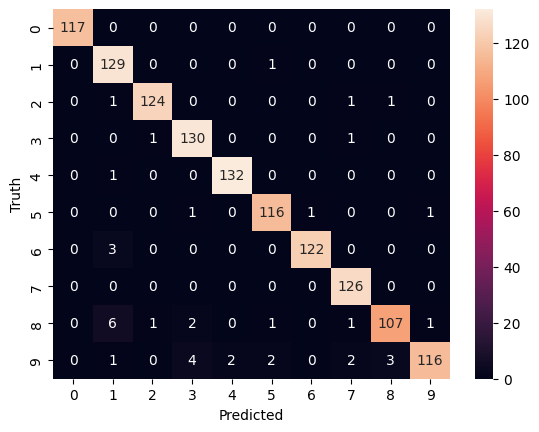

In [36]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       0.91      0.99      0.95       130
           2       0.98      0.98      0.98       127
           3       0.95      0.98      0.97       132
           4       0.99      0.99      0.99       133
           5       0.97      0.97      0.97       119
           6       0.99      0.98      0.98       125
           7       0.96      1.00      0.98       126
           8       0.96      0.90      0.93       119
           9       0.98      0.89      0.94       130

    accuracy                           0.97      1258
   macro avg       0.97      0.97      0.97      1258
weighted avg       0.97      0.97      0.97      1258



In [44]:
clf.best_score_

np.float64(0.9671711544413494)

In [45]:
clf.best_params_

{'n_neighbors': 2}